# Data Science
# Exercise 1 (Part 2/2: Big Data Set)
<br/>se21m024
<br/>Thomas Stummer
<br/>Big Dataset: Census Income
<br/><br/>
*The interpretation of the diagrams is printed directly above the diagrams under the headline "Interpretation".*
<br/><br/>
Data taken from:
<br/>https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29
<br/><br/>
Data Original Owner:
<br/>U.S. Census Bureau
<br/>http://www.census.gov/
<br/>United States Department of Commerce
<br/><br/>
Donor:
<br/>Terran Lane and Ronny Kohavi
<br/>Data Mining and Visualization
<br/>Silicon Graphics.
<br/>terran '@' ecn.purdue.edu, ronnyk '@' sgi.com

# Import necessary dependencies

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
import math as math
import itertools as it

pd.options.display.max_columns = None

%matplotlib inline

# Load and merge datasets

In [136]:
columns = ['age', 'class of worker', 'detailed industry recode', 'detailed occupation recode', 'education', 'wage per hour', 
'enroll in edu inst last wk', 'marital stat', 'major industry code', 'major occupation code', 'race', 
'hispanic origin', 'sex', 'member', 'reason for unemployment', 'full or part time employment stat', 
'capital gains', 'capital losses', 'dividends from stocks', 'tax filer stat', 'region of previous residence', 
'state of previous residence', 'detailed household and family stat', 'detailed household summary in household',  
'instance weight', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 
'live in this house 1 year ago', 'migration prev res in sunbelt', 'num persons worked for employer', 'family members under 18', 
'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship', 'own business or self employed', 
'fill inc questionnaire for veterans admin', 'veterans benefits', 'weeks worked in year', 'year', '???']

raw_data = pd.read_csv('./Data Sets/Census-Income/census-income.data', sep=',', names = columns, skipinitialspace=True)

# re-shuffle records just to randomize data points
raw_data = raw_data.sample(frac=1, random_state=42).reset_index(drop=True)
raw_data.head()

age     class of worker  detailed industry recode  \
0   47    Local government                        43   
1   39             Private                        25   
2   56             Private                        41   
3   39  Federal government                        50   
4   11     Not in universe                         0   

   detailed occupation recode                            education  \
0                          26                 High school graduate   
1                          26                 High school graduate   
2                           8  Associates degree-occup /vocational   
3                           6           Bachelors degree(BA AB BS)   
4                           0                             Children   

   wage per hour enroll in edu inst last wk                     marital stat  \
0              0            Not in universe  Married-civilian spouse present   
1              0            Not in universe                         Divorced   
2            600            Not in universe  Married-civilian spouse present   
3              0            Not in universe  Married-civilian spouse present   
4              0            Not in universe                    Never married   

              major industry code           major occupation code   race  \
0                       Education  Adm support including clerical  White   
1  Manufacturing-nondurable goods  Adm support including clerical  White   
2               Hospital services          Professional specialty  White   
3           Public administration          Professional specialty  White   
4     Not in universe or children                 Not in universe  White   

  hispanic origin     sex           member reason for unemployment  \
0       All other  Female  Not in universe         Not in universe   
1       All other    Male  Not in universe         Not in universe   
2       All other  Female               No         Not in universe   
3       All other  Female  Not in universe         Not in universe   
4       All other  Female  Not in universe         Not in universe   

  full or part time employment stat  capital gains  capital losses  \
0          Children or Armed Forces              0               0   
1               Full-time schedules              0               0   
2               Full-time schedules              0               0   
3          Children or Armed Forces              0               0   
4          Children or Armed Forces              0               0   

   dividends from stocks       tax filer stat region of previous residence  \
0                      0  Joint both under 65              Not in universe   
1                      0               Single              Not in universe   
2                      0  Joint both under 65              Not in universe   
3                    375  Joint both under 65              Not in universe   
4                      0             Nonfiler                      Midwest   

  state of previous residence     detailed household and family stat  \
0             Not in universe                  Spouse of householder   
1             Not in universe                  Nonfamily householder   
2             Not in universe                  Spouse of householder   
3             Not in universe                  Spouse of householder   
4                     Indiana  Child <18 never marr not in subfamily   

  detailed household summary in household  instance weight  \
0                   Spouse of householder           617.17   
1                             Householder          1314.73   
2                   Spouse of householder          2227.14   
3                   Spouse of householder          1203.99   
4            Child under 18 never married          1959.69   

  migration code-change in msa migration code-change in reg  \
0                     Nonmover                     Nonmover   
1                            ?                            ?   
2

# Show dataset features and values

In [137]:
# Examine only a subset of all attributes
numericalColumns = ['age', 'wage per hour', ]

categoryColumns = [
    'class of worker', 
    'education', 
    'race', 
    'hispanic origin', 
    'sex', 
    'year'
]

subset_attributes = numericalColumns + categoryColumns

# Assumption: The wage per hour is reprecented in Dollar Cents. For clearer interpretation it is converted to Dollars.
print("Assumption: The wage per hour is reprecented in Dollar Cents. For clearer interpretation it is converted to Dollars.")
raw_data['wage per hour'] = raw_data['wage per hour'].apply(lambda value: value / 100)

# Fix wage per hour = 0
raw_data['wage per hour'] = raw_data['wage per hour'].apply(lambda value: None if value == 0 else value)

data=raw_data[subset_attributes]
data.head()



Assumption: The wage per hour is reprecented in Dollar Cents. For clearer interpretation it is converted to Dollars.


age  wage per hour     class of worker  \
0   47            NaN    Local government   
1   39            NaN             Private   
2   56            6.0             Private   
3   39            NaN  Federal government   
4   11            NaN     Not in universe   

                             education   race hispanic origin     sex  year  
0                 High school graduate  White       All other  Female    94  
1                 High school graduate  White       All other    Male    95  
2  Associates degree-occup /vocational  White       All other  Female    95  
3           Bachelors degree(BA AB BS)  White       All other  Female    94  
4                             Children  White       All other  Female    94

# Exploratory Data Analysis and Visualizations

## Descriptive Statistics

In [138]:

round(data[numericalColumns].describe(),2)

age  wage per hour
count  199523.00       11304.00
mean       34.49           9.78
std        22.31           6.56
min         0.00           0.20
25%        15.00           5.85
50%        33.00           8.00
75%        50.00          12.00
max        90.00          99.99

# Univariate Analysis

## Visualizing one dimension

### Wage per hour

Interpretation:
  The average wage per hour is 9.78$ with a standard deviation of of 6.56$.


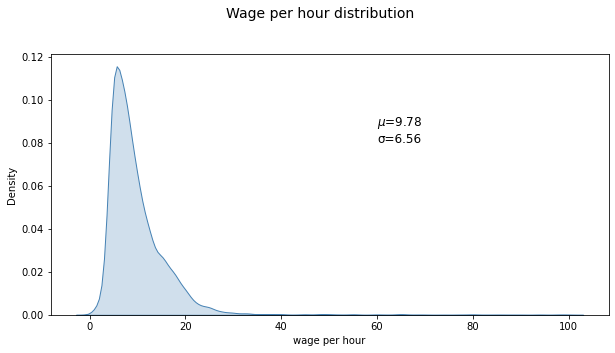

In [139]:
attribute='wage per hour'

fig = plt.figure(figsize = (10, 5))
title = fig.suptitle("Wage per hour distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1, 1, 1)
ax1.set_xlabel(attribute)
ax1.set_ylabel("Density") 
ax1.text(60, 0.08, r'$\mu$='+str(round(data[attribute].mean(),2)) + '\n\u03C3='+str(round(data[attribute].std(),2)), fontsize=12)
sns.kdeplot(data[attribute], ax=ax1, shade=True, color='steelblue')

print("Interpretation:")
print("  The average wage per hour is 9.78$ with a standard deviation of of 6.56$.")

# Multivariate Analysis

## Visualizing two dimensions

### Wage per hour grouped by education

Interpretation:
  Residents with a Prof school degree have the highest mean wage per hour, followed by those with a PhD.
  Residents with no high school graduation (less than 1st grade up to 11th grade) have a lower mean wage than those with a high school, collage or other tertiary graduation.


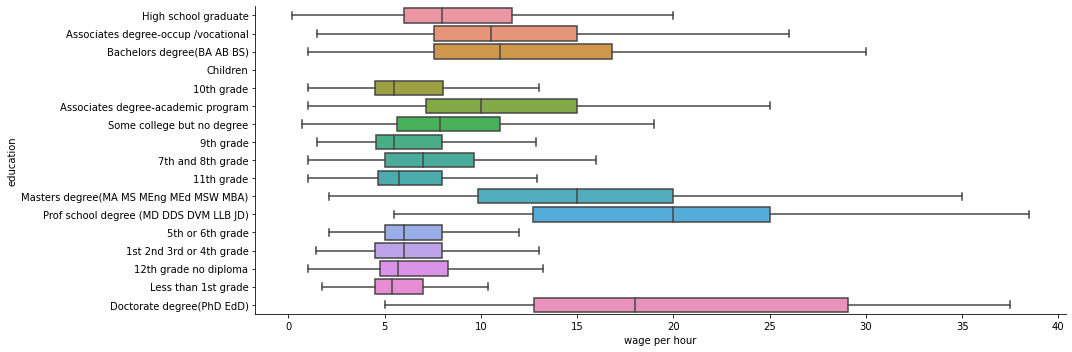

In [140]:
sns.catplot(x="wage per hour", y="education", kind="box", data=data,  aspect=3, showfliers = False)

print("Interpretation:")
print("  Residents with a Prof school degree have the highest mean wage per hour, followed by those with a PhD.")
print("  Residents with no high school graduation (less than 1st grade up to 11th grade) have a lower mean wage than those with a high school, collage or other tertiary graduation.")


### Wage per hour grouped by class of worker

Interpretation:
  Residents employed by the federal government generally have the highest wage per hour.
  Residents employed by private companies generally have the lowest wage per hour.


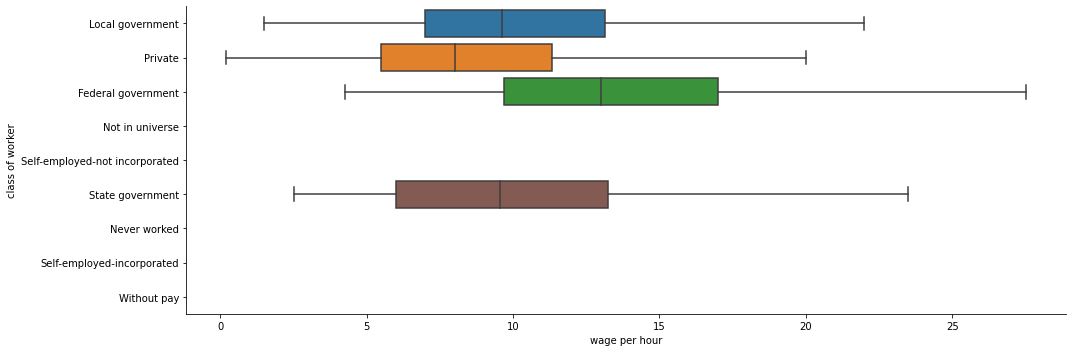

In [141]:
sns.catplot(x="wage per hour", y="class of worker", kind="box", data=raw_data,  aspect=3, showfliers = False)

print("Interpretation:")
print("  Residents employed by the federal government generally have the highest wage per hour.")
print("  Residents employed by private companies generally have the lowest wage per hour.")

### Wage per hour based on age

Interpretation:
  In the age between 30 and 60 a higher wage seems more likely. Especially when considering the age of around 75 and above the deviation in the wage is not very high any more.


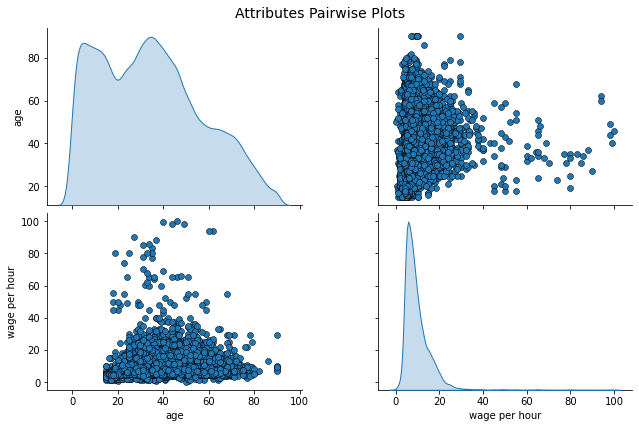

In [142]:
cols = numericalColumns
pp = sns.pairplot(data[cols], height=3.0, aspect=1.5,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Attributes Pairwise Plots', fontsize=14)

print("Interpretation:")
print("  In the age between 30 and 60 a higher wage seems more likely. Especially when considering the age of around 75 and above the deviation in the wage is not very high any more.")

Detailed view for wage per hour based on.


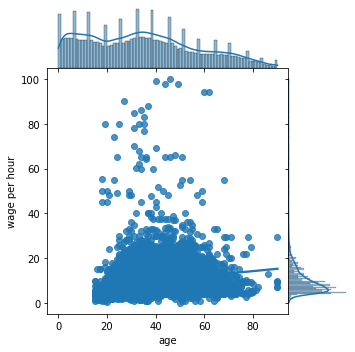

In [143]:
jp = sns.jointplot(x='age', y='wage per hour', data=data,
              kind='reg', space=0, height=5, ratio=4)

print("Detailed view for wage per hour based on.")

### Resident attributes grouped by sex

Interpretation:
  The majority of self-employed residents and those who work for private companies or federal government are male.
  Females on the other hand are the major workers for local or state government, although the gape is not very big.
  Females are more likely to be not payed at all compaired to males.
  Males are more likely self-employed or work for private companies than females.
  No significant difference in the distribution of race or hispanic origin can be spotted when comparing males and females.


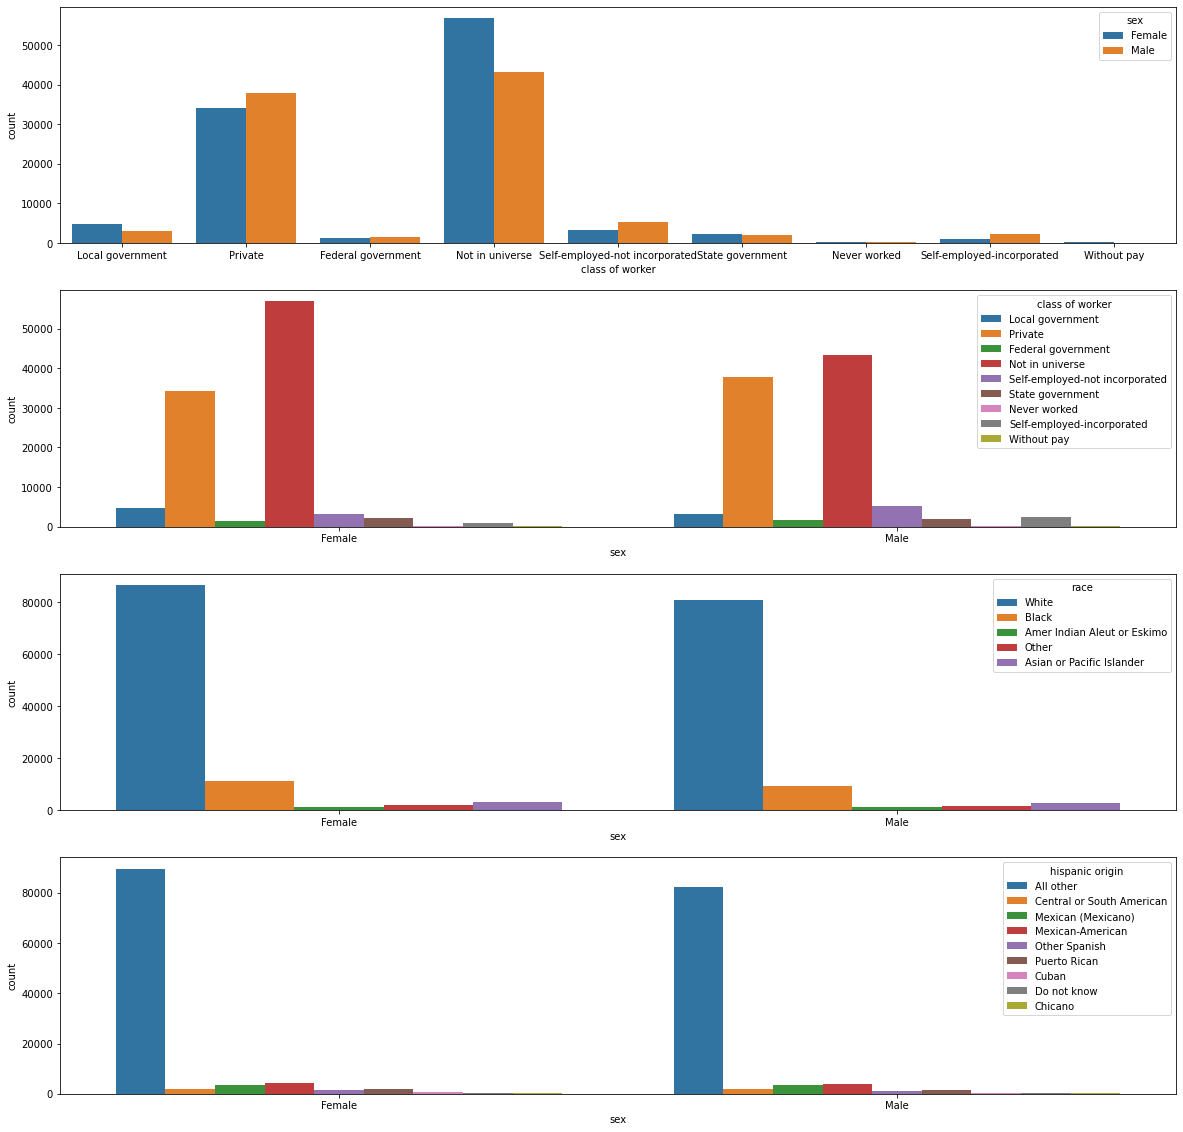

In [144]:
def printFigure(category_a, category_b, ax_idx):
    sns.countplot(x=category_a, hue=category_b, data=data, ax=ax_idx)

combinations = [
    ['class of worker', 'sex'],
    ['sex', 'class of worker'],
    ['sex', 'race'],
    ['sex', 'hispanic origin']
]

num_combinations = len(combinations)

num_rows = num_combinations

fig, ax =plt.subplots(num_rows, 1, figsize=(20, 5*num_rows))

idx=0

for cat_a, cat_b in combinations:
    if cat_a == cat_b:
        continue

    printFigure(cat_a, cat_b, ax[idx])
    idx+=1

print("Interpretation:")

print("  The majority of self-employed residents and those who work for private companies or federal government are male.")
print("  Females on the other hand are the major workers for local or state government, although the gape is not very big.")

print("  Females are more likely to be not payed at all compaired to males.")
print("  Males are more likely self-employed or work for private companies than females.")

print("  No significant difference in the distribution of race or hispanic origin can be spotted when comparing males and females.")



### Wage per hour based on sex

Interpretation:
  Males have a higher mean wage of 10.89$ per hour compard to females which have a mean wage of 8.75$ per hour.
  The wages of males have a higher deviation than those of females.


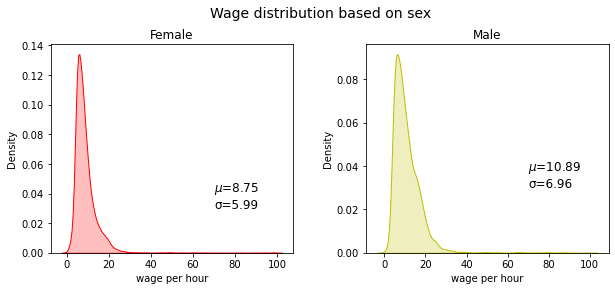

In [145]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Wage distribution based on sex", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

attribute = 'wage per hour'
category = 'sex'

subData = data[data[category] == 'Female']
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Female")
ax1.set_xlabel(attribute)
ax1.set_ylabel("Density") 
ax1.text(70, 0.03, r'$\mu$='+str(round(subData[attribute].mean(),2)) + '\n\u03C3='+str(round(subData[attribute].std(),2)), fontsize=12)
sns.kdeplot(subData[attribute], ax=ax1, shade=True, color='r')

subData = data[data[category] == 'Male']
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Male")
ax2.set_xlabel(attribute)
ax2.set_ylabel("Density") 
ax2.text(70, 0.03, r'$\mu$='+str(round(subData[attribute].mean(),2)) + '\n\u03C3='+str(round(subData[attribute].std(),2)), fontsize=12)
sns.kdeplot(subData[attribute], ax=ax2, shade=True, color='y')

print("Interpretation:")
print("  Males have a higher mean wage of 10.89$ per hour compard to females which have a mean wage of 8.75$ per hour.")
print("  The wages of males have a higher deviation than those of females.")

Interpretation:
  The mean wage as well as the lower and upper quartile for males is higher than those for females.
  The deviation for is also higher for males than for females.


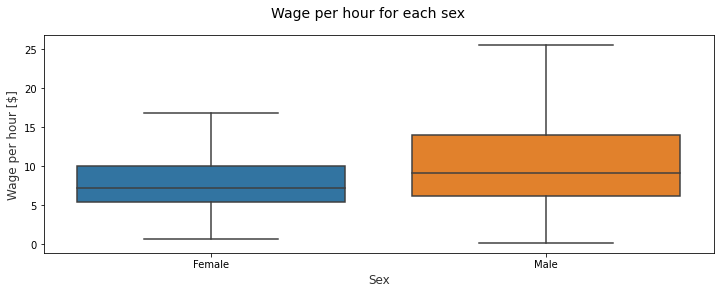

In [146]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wage per hour for each sex', fontsize=14)

sns.boxplot(x="sex", y="wage per hour", data=data,  ax=ax, showfliers = False)
ax.set_xlabel("Sex",size = 12,alpha=0.8)
ax.set_ylabel("Wage per hour [$]",size = 12,alpha=0.8)

print("Interpretation:")
print("  The mean wage as well as the lower and upper quartile for males is higher than those for females.")
print("  The deviation for is also higher for males than for females.")

### Wage per hour based on year

Interpretation:
  The mean wage per hour has increased by 0.26$ from 1994 to 1995. The standard devation decreased by 0.67$.


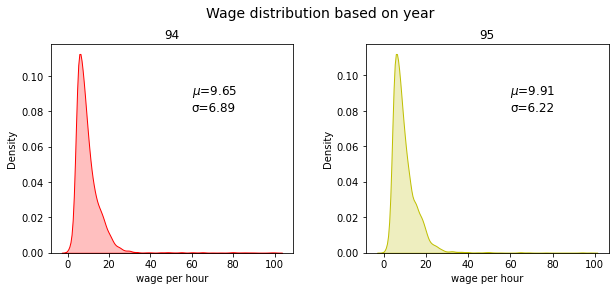

In [147]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Wage distribution based on year", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

attribute = 'wage per hour'
category = 'year'

subData = data[data[category] == 94]
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("94")
ax1.set_xlabel(attribute)
ax1.set_ylabel("Density") 
ax1.text(60, 0.08, r'$\mu$='+str(round(subData[attribute].mean(),2)) + '\n\u03C3='+str(round(subData[attribute].std(),2)), fontsize=12)
sns.kdeplot(subData[attribute], ax=ax1, shade=True, color='r')

subData = data[data[category] == 95]
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("95")
ax2.set_xlabel(attribute)
ax2.set_ylabel("Density") 
ax2.text(60, 0.08, r'$\mu$='+str(round(subData[attribute].mean(),2)) + '\n\u03C3='+str(round(subData[attribute].std(),2)), fontsize=12)
sns.kdeplot(subData[attribute], ax=ax2, shade=True, color='y')

print("Interpretation:")
print("  The mean wage per hour has increased by 0.26$ from 1994 to 1995. The standard devation decreased by 0.67$.")

## Visualizing three dimensions

### Wage per hour based on age and sex

Interpretation:
  No difference in the correlation for age and wage can be found when comparing males to females.


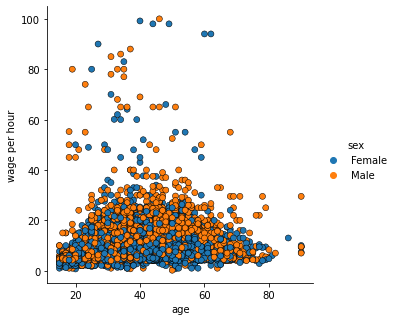

In [148]:
jp = sns.pairplot(data, x_vars=["age"], y_vars=["wage per hour"], height=4.5,
                  hue="sex", 
                  plot_kws=dict(edgecolor="k", linewidth=0.5))

print("Interpretation:")
print("  No difference in the correlation for age and wage can be found when comparing males to females.")

## Visualizing four dimensions

### Wage per hour based on age, sex and year

Interpretation:
  No difference in the wage trend can be spotted when comparing males an females.
  Generally, outliers with high income seem slightly more likely in 1994 compared to 1995.


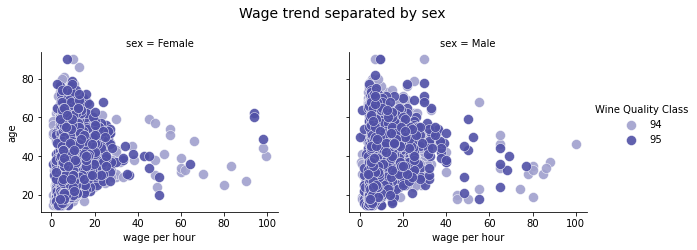

In [150]:
g = sns.FacetGrid(data, col='sex', hue='year',
                  aspect=1.2, height=3.5, palette=sns.light_palette('navy', 4)[1:])
g.map(plt.scatter, "wage per hour", "age", alpha=0.9, 
      edgecolor='white', linewidth=0.5, s=100)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wage trend separated by sex', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

print("Interpretation:")
print("  No difference in the wage trend can be spotted when comparing males an females.")
print("  Generally, outliers with high income seem slightly more likely in 1994 compared to 1995.")